# Current Issues (December 30, 2020)



* 100 sequences is not enough to substantially test the features
* Besides Realm level and Phylum level, all other taxonomic levels have at most two sublevels with at least 1000 sequences 
    * (becomes binary problem)
    * (Subgenus level not tested yet)






# PyCaret Using Google Drive

In [ ]:
# installations
!pip install -U tensorflow-gpu==2.0.0 grpcio
!pip install pycaret
!pip install -U -q PyDrive

In [ ]:
# imports
import numpy as np 
import pandas as pd 
from pycaret.classification import * 

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [73]:

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Use for 100 sequences

In [ ]:
# Generate Dataframe of Shareable Links across all Taxonomic Levels

link = "https://drive.google.com/file/d/1SCWKXHmDLva1OQPQC2Igq3pvZL2HZ1-0/view?usp=sharing"

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('links.csv')   
  
link_df = pd.read_csv('links.csv') 
link_df = link_df.drop(columns = 'Unnamed: 0')

taxonomic_dict = link_df.set_index('Taxonomic Level').T.to_dict('Link')
# print(taxonomic_dict)

In [ ]:
# Generating Dataframe for Specific Taxonomic Level
taxonomic_level = input("Taxonomic Level: ")
taxonomic_level = f"{taxonomic_level}_100"

link = taxonomic_dict[taxonomic_level][0]

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile(f'{taxonomic_level}.csv')   
  
df = pd.read_csv(f'{taxonomic_level}.csv') 
# taxonomic_df = taxonomic_df.drop(columns = 'Unnamed: 0')

print(df)

Taxonomic Level: Subgenus
     Unnamed: 0 Sublevel Name  pp_magtropy  pp_avg_magnitude   entropy
0             0   Nobecovirus   110.844782        152.921609  1.379601
1             1   Nobecovirus   109.695923        149.940210  1.366871
2             2   Nobecovirus   110.029262        149.729067  1.360811
3             3   Nobecovirus   110.036912        149.702212  1.360473
4             4   Nobecovirus   110.036912        149.702212  1.360473
..          ...           ...          ...               ...       ...
307         307  sarbecovirus   110.009289        150.656386  1.369488
308         308  sarbecovirus   110.387178        151.229767  1.369994
309         309  sarbecovirus   110.648067        151.590971  1.370028
310         310  sarbecovirus   110.454212        151.197165  1.368867
311         311  sarbecovirus   111.406503        152.533797  1.369164

[312 rows x 5 columns]


# Use for everything else

In [74]:
# Generating Dataframe for taxonomic level MANUAL
link = "https://drive.google.com/file/d/1l7RHxMQ5QPSPzIuh-IBT7yJj-XAYhAiP/view?usp=sharing"
 
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Phylum.csv')   
  
df = pd.read_csv('Phylum.csv')
df = df.drop(columns = 'Unnamed: 0') 
print(df)

        Sublevel_Name  pp_magtropy  pp_avg_magnitude   entropy
0     Kitrinoviricota    59.065861         81.529775  1.380320
1     Kitrinoviricota    65.227602         89.352106  1.369851
2     Kitrinoviricota    58.869421         81.371537  1.382238
3     Kitrinoviricota    58.563202         79.665909  1.360341
4     Kitrinoviricota    65.501170         89.763867  1.370416
...               ...          ...               ...       ...
3995  Negarnaviricota    24.635554         33.592519  1.363579
3996  Negarnaviricota    27.673127         38.241985  1.381918
3997  Negarnaviricota    69.541719         95.965966  1.379977
3998  Negarnaviricota    26.521589         36.177863  1.364091
3999  Negarnaviricota    29.859209         40.803679  1.366536

[4000 rows x 4 columns]


In [75]:
# Generating Dataframe for COVID-19 Sequences
covid_link = "https://drive.google.com/file/d/1wh57NhGylgVCcQRQjRm-I5T5KUXL7aye/view?usp=sharing"
 
# to get the id part of the file 
id = covid_link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Covid-19.csv')   
  
covid_19_df = pd.read_csv('Covid-19.csv')
covid_19_df = covid_19_df.drop(columns = 'Unnamed: 0') 
print(covid_19_df)

   Sublevel Name  pp_magtropy  pp_avg_magnitude   entropy
0          COVID   111.576174        151.603697  1.358746
1          COVID   111.729663        151.566275  1.356545
2          COVID   111.643496        151.446188  1.356516
3          COVID   111.630832        151.825897  1.360071
4          COVID   111.691524        151.518776  1.356583
..           ...          ...               ...       ...
95         COVID   111.589942        151.385375  1.356622
96         COVID   111.660158        151.463230  1.356466
97         COVID   111.510981        151.275429  1.356597
98         COVID   111.812637        151.682703  1.356579
99         COVID   111.671043        151.493668  1.356607

[100 rows x 4 columns]


# Magtropy



In [76]:
magtropy_df = df.drop(columns = ["pp_avg_magnitude", "entropy"])
print(magtropy_df)

        Sublevel_Name  pp_magtropy
0     Kitrinoviricota    59.065861
1     Kitrinoviricota    65.227602
2     Kitrinoviricota    58.869421
3     Kitrinoviricota    58.563202
4     Kitrinoviricota    65.501170
...               ...          ...
3995  Negarnaviricota    24.635554
3996  Negarnaviricota    27.673127
3997  Negarnaviricota    69.541719
3998  Negarnaviricota    26.521589
3999  Negarnaviricota    29.859209

[4000 rows x 2 columns]


In [78]:
experiment = setup(data=magtropy_df, target='Sublevel_Name') 
# if the error states target is not defined, change from Sublevel_Name to Sublevel Name or vice versa
# label encodings alphabetical
# Duplornaviricota: 0
# Kitrinoviricota: 1
# Negarnaviricota: 2
#Pisuviricota: 3

,Description,Value
0,session_id,5085
1,Target,Sublevel_Name
2,Target Type,Multiclass
3,Label Encoded,"Duplornaviricota: 0, Kitrinoviricota: 1, Negar..."
4,Original Data,"(4000, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [79]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7914,0.9350,0.7910,0.7959,0.7916,0.7217,0.7229,0.799
catboost,CatBoost Classifier,0.7871,0.9375,0.7868,0.7903,0.7875,0.7160,0.7168,2.825
lightgbm,Light Gradient Boosting Machine,0.7856,0.9346,0.7854,0.7896,0.7861,0.7141,0.7150,0.281
xgboost,Extreme Gradient Boosting,0.7828,0.9351,0.7826,0.7848,0.7827,0.7103,0.7110,2.280
knn,K Neighbors Classifier,0.7771,0.9157,0.7767,0.7810,0.7770,0.7027,0.7039,0.122
dt,Decision Tree Classifier,0.7321,0.8214,0.7319,0.7331,0.7318,0.6427,0.6432,0.023
rf,Random Forest Classifier,0.7321,0.9109,0.7319,0.7331,0.7318,0.6427,0.6432,0.612
et,Extra Trees Classifier,0.7321,0.8815,0.7319,0.7330,0.7318,0.6427,0.6432,0.532
ada,Ada Boost Classifier,0.5981,0.7459,0.5959,0.6128,0.5590,0.4633,0.4880,0.146
qda,Quadratic Discriminant Analysis,0.5245,0.7242,0.5237,0.4926,0.4424,0.3657,0.4015,0.021


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5085, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
estimator = create_model('gbc') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7571,0.9198,0.7571,0.7617,0.7577,0.6762,0.6772
1,0.8357,0.9561,0.8355,0.8363,0.8356,0.7809,0.7812
2,0.7571,0.9263,0.7566,0.7668,0.7575,0.6760,0.6791
3,0.8036,0.9271,0.8032,0.8052,0.8033,0.7380,0.7387
4,0.7893,0.9345,0.7889,0.8025,0.7903,0.7189,0.7217
5,0.7786,0.9362,0.7786,0.7827,0.7790,0.7047,0.7056
6,0.7607,0.9136,0.7604,0.7636,0.7610,0.6809,0.6816
7,0.8214,0.9434,0.8210,0.8256,0.8224,0.7619,0.7626
8,0.7964,0.9443,0.7953,0.7969,0.7946,0.7284,0.7297
9,0.8136,0.9484,0.8134,0.8180,0.8149,0.7515,0.7520


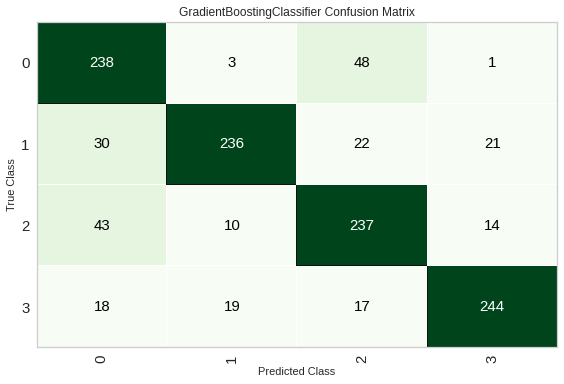

In [81]:
plot_model(estimator, 'confusion_matrix')

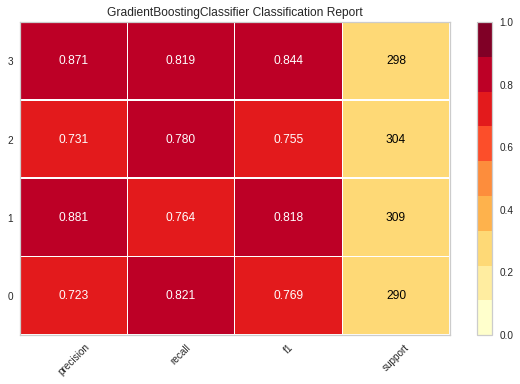

In [82]:
plot_model(estimator, 'class_report')

In [83]:
magtropy_Covid_df = covid_19_df.drop(columns = ["pp_avg_magnitude", "entropy"])
print(magtropy_Covid_df)

   Sublevel Name  pp_magtropy
0          COVID   111.576174
1          COVID   111.729663
2          COVID   111.643496
3          COVID   111.630832
4          COVID   111.691524
..           ...          ...
95         COVID   111.589942
96         COVID   111.660158
97         COVID   111.510981
98         COVID   111.812637
99         COVID   111.671043

[100 rows x 2 columns]


In [84]:
X_test = magtropy_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
100


In [85]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[  3]
 [100]]


# Magnitude avg


In [86]:
avg_magnitude_df = df.drop(columns = ["pp_magtropy", "entropy"])
print(avg_magnitude_df)

        Sublevel_Name  pp_avg_magnitude
0     Kitrinoviricota         81.529775
1     Kitrinoviricota         89.352106
2     Kitrinoviricota         81.371537
3     Kitrinoviricota         79.665909
4     Kitrinoviricota         89.763867
...               ...               ...
3995  Negarnaviricota         33.592519
3996  Negarnaviricota         38.241985
3997  Negarnaviricota         95.965966
3998  Negarnaviricota         36.177863
3999  Negarnaviricota         40.803679

[4000 rows x 2 columns]


In [88]:
experiment = setup(data=avg_magnitude_df, target='Sublevel_Name') 

,Description,Value
0,session_id,5743
1,Target,Sublevel_Name
2,Target Type,Multiclass
3,Label Encoded,"Duplornaviricota: 0, Kitrinoviricota: 1, Negar..."
4,Original Data,"(4000, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [89]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7957,0.9406,0.7956,0.8018,0.7960,0.7276,0.7292,0.833
xgboost,Extreme Gradient Boosting,0.7946,0.9416,0.7945,0.7985,0.7950,0.7262,0.7271,2.125
knn,K Neighbors Classifier,0.7907,0.9262,0.7906,0.7953,0.7909,0.7209,0.7222,0.123
lightgbm,Light Gradient Boosting Machine,0.7899,0.9399,0.7898,0.7954,0.7905,0.7200,0.7213,0.278
catboost,CatBoost Classifier,0.7881,0.9427,0.7880,0.7935,0.7885,0.7176,0.7190,2.782
dt,Decision Tree Classifier,0.7642,0.8429,0.7639,0.7653,0.7639,0.6856,0.6861,0.023
rf,Random Forest Classifier,0.7642,0.9253,0.7639,0.7653,0.7639,0.6856,0.6861,0.619
et,Extra Trees Classifier,0.7628,0.9019,0.7624,0.7641,0.7626,0.6837,0.6842,0.532
ada,Ada Boost Classifier,0.6445,0.8042,0.6427,0.6851,0.6333,0.5254,0.5415,0.151
nb,Naive Bayes,0.5181,0.7164,0.5138,0.4661,0.4387,0.3558,0.3889,0.021


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5743, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
estimator = create_model('gbc') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7464,0.9303,0.7462,0.7569,0.7478,0.6621,0.6642
1,0.7679,0.9312,0.7675,0.7782,0.7687,0.6904,0.6934
2,0.8000,0.9461,0.8000,0.8082,0.7986,0.7334,0.7363
3,0.7893,0.9396,0.7892,0.7932,0.7904,0.7191,0.7197
4,0.8107,0.9414,0.8108,0.8158,0.8120,0.7477,0.7485
5,0.8143,0.9522,0.8138,0.8200,0.8149,0.7524,0.7539
6,0.8000,0.9390,0.7999,0.8083,0.7999,0.7334,0.7360
7,0.8321,0.9466,0.8323,0.8368,0.8332,0.7763,0.7771
8,0.7750,0.9230,0.7756,0.7787,0.7741,0.7001,0.7018
9,0.8208,0.9566,0.8205,0.8216,0.8208,0.7610,0.7613


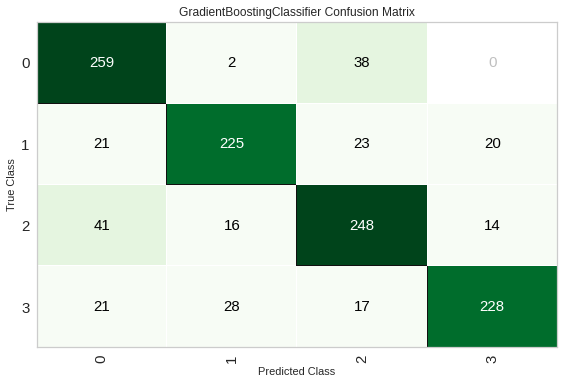

In [91]:
plot_model(estimator, 'confusion_matrix')

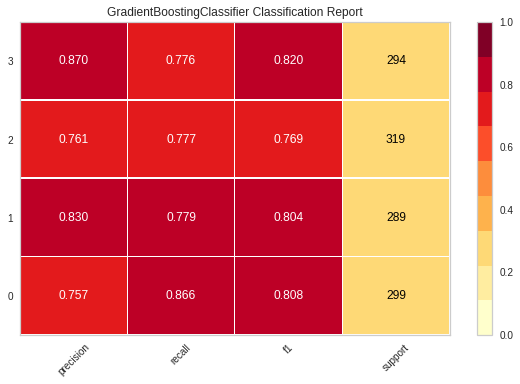

In [92]:
plot_model(estimator, 'class_report')

In [93]:
magnitude_avg_Covid_df = covid_19_df.drop(columns = ["pp_magtropy", "entropy"])
print(magnitude_avg_Covid_df )

   Sublevel Name  pp_avg_magnitude
0          COVID        151.603697
1          COVID        151.566275
2          COVID        151.446188
3          COVID        151.825897
4          COVID        151.518776
..           ...               ...
95         COVID        151.385375
96         COVID        151.463230
97         COVID        151.275429
98         COVID        151.682703
99         COVID        151.493668

[100 rows x 2 columns]


In [94]:
X_test = magnitude_avg_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
100


In [95]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[  3]
 [100]]


# Entropy


In [96]:
entropy_df = df.drop(columns = ["pp_magtropy","pp_avg_magnitude"])
print(entropy_df)

        Sublevel_Name   entropy
0     Kitrinoviricota  1.380320
1     Kitrinoviricota  1.369851
2     Kitrinoviricota  1.382238
3     Kitrinoviricota  1.360341
4     Kitrinoviricota  1.370416
...               ...       ...
3995  Negarnaviricota  1.363579
3996  Negarnaviricota  1.381918
3997  Negarnaviricota  1.379977
3998  Negarnaviricota  1.364091
3999  Negarnaviricota  1.366536

[4000 rows x 2 columns]


In [98]:
experiment = setup(data=entropy_df, target='Sublevel_Name') 

,Description,Value
0,session_id,6735
1,Target,Sublevel_Name
2,Target Type,Multiclass
3,Label Encoded,"Duplornaviricota: 0, Kitrinoviricota: 1, Negar..."
4,Original Data,"(4000, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [99]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.4870,0.7450,0.4860,0.4865,0.4832,0.3155,0.3170,2.736
lightgbm,Light Gradient Boosting Machine,0.4823,0.7356,0.4814,0.4806,0.4788,0.3095,0.3106,0.268
gbc,Gradient Boosting Classifier,0.4730,0.7434,0.4717,0.4729,0.4675,0.2968,0.2991,0.803
xgboost,Extreme Gradient Boosting,0.4477,0.7194,0.4468,0.4460,0.4451,0.2633,0.2641,2.663
ada,Ada Boost Classifier,0.4459,0.7114,0.4442,0.4567,0.4358,0.2602,0.2663,0.146
knn,K Neighbors Classifier,0.4398,0.6936,0.4388,0.4466,0.4367,0.2526,0.2547,0.129
dt,Decision Tree Classifier,0.4037,0.6025,0.4031,0.4040,0.4033,0.2049,0.2051,0.024
rf,Random Forest Classifier,0.4034,0.6816,0.4028,0.4038,0.4030,0.2044,0.2046,0.666
et,Extra Trees Classifier,0.4019,0.6394,0.4013,0.4019,0.4011,0.2025,0.2028,0.570
lda,Linear Discriminant Analysis,0.3769,0.6409,0.3728,0.2987,0.3092,0.1657,0.1928,0.021


In [100]:
estimator = create_model('catboost') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5179,0.7687,0.5171,0.5169,0.5124,0.3569,0.3591
1,0.4714,0.7508,0.4709,0.4762,0.4716,0.2953,0.2962
2,0.4750,0.7046,0.4742,0.4726,0.4692,0.2996,0.3014
3,0.5321,0.7688,0.5305,0.5368,0.5296,0.3756,0.3776
4,0.4821,0.7346,0.4801,0.4840,0.4757,0.3085,0.3116
5,0.4786,0.7272,0.4771,0.4792,0.4756,0.3041,0.3054
6,0.5143,0.7459,0.5132,0.5119,0.5102,0.3519,0.3533
7,0.4536,0.7440,0.4534,0.4473,0.4483,0.2710,0.2720
8,0.4571,0.7526,0.4565,0.4512,0.4526,0.2760,0.2767
9,0.4875,0.7528,0.4867,0.4885,0.4872,0.3165,0.3169


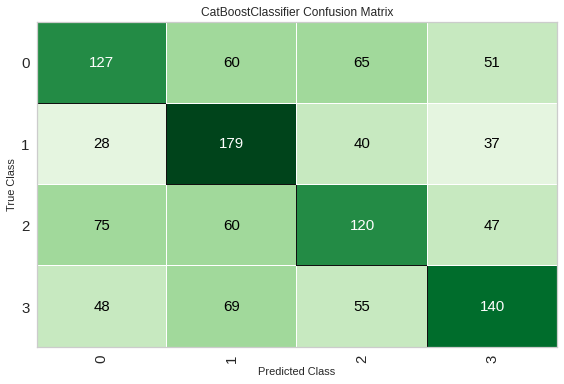

In [101]:
plot_model(estimator, 'confusion_matrix')

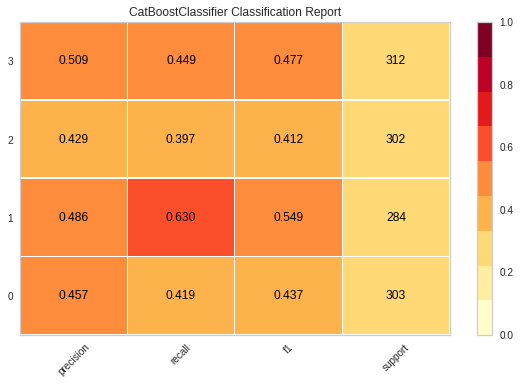

In [102]:
plot_model(estimator, 'class_report')

In [103]:
entropy_Covid_df = covid_19_df.drop(columns = ["pp_avg_magnitude", "pp_magtropy"])
print(entropy_Covid_df)

   Sublevel Name   entropy
0          COVID  1.358746
1          COVID  1.356545
2          COVID  1.356516
3          COVID  1.360071
4          COVID  1.356583
..           ...       ...
95         COVID  1.356622
96         COVID  1.356466
97         COVID  1.356597
98         COVID  1.356579
99         COVID  1.356607

[100 rows x 2 columns]


In [104]:
X_test =entropy_Covid_df.drop(columns = ["Sublevel Name"])
predict = estimator.predict(X_test)
print(predict)
print(len(predict))

[[2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]
100


In [105]:
unique_elements, count_elements = np.unique(predict, return_counts = "True")
results = np.asarray((unique_elements, count_elements))
print(results)

[[ 0  1  2]
 [11  3 86]]
